In [1]:
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from mpl_toolkits.mplot3d import Axes3D


act='tanh'
nlayers=51
nneurons1=2
nneurons2=2


input1 = Input(shape=(2,))
x1 = Dense(nneurons1, activation=act)(input1)
#x1 = Dense(nneurons1, activation=act)(x1)
#x1 = Dense(nneurons1, activation=act)(x1)

added = Add()([0.05*x1, input1])

for i in range(nlayers-1):
    x1 = Dense(nneurons1, activation=act)(added)
    #x1 = Dense(nneurons2, activation=act)(x1)
    #x1 = Dense(nneurons1, activation=act)(x1)
    added = Add()([0.05*x1, added])


    
out = Dense(1, activation='sigmoid')(added)
model = Model(inputs=[input1], outputs=out)



def generatorringsgap(n, sp = 0.15, resnet=False):
    
    
    import random
    import numpy as np
    
    n2 = int(n/2)
    
    z = np.zeros((n,))
    
    r1 = np.array([(0.5-sp)*random.random() for i in range(n2)])
    r2 = np.array([((0.5*random.random()+0.5)*(1-sp))+sp for i in range(n2)])
    r = np.zeros((n,))
    r[0:n2] = r1
    r[n2::] = r2
    z[n2::] = 1

    theta = np.array([2*np.pi*random.random() for i in range(n)])
    
    x = np.multiply(np.cos(theta), r)
    y = np.multiply(np.sin(theta), r)
    
    if resnet:
        x = [x,y, np.zeros((n,))]
    else:
        x = [x,y]
    
    #x = np.transpose(x)
    
    return x, z


def binarycolor(Z, c1, c2):
    
    import numpy as np
    
    Z = np.where(Z==0, c1, Z)
    Z = np.where(Z=='1.0', c2, Z)
    
    return Z

In [2]:
def spiral(npoints):
    
    sp = [[] for i in range(npoints)]
    z = [0 for i in range(npoints)]
    
    import random
    import numpy as np
    
    count = 0
    
    i=0
    
    while i < npoints:
    

        a = 1
        b = -1
        theta = 0.1 + random.random()
        sgn = random.randint(0,1)

        r = a + b*theta
        
        z[i] = sgn

        
        if sgn==0:
            sp[i] = [ r*np.cos(6*theta), r*np.sin(6*theta)]
        
        if sgn==1:
            sp[i] = [ -r*np.cos(6*theta), -r*np.sin(6*theta)]
            
        
        if np.absolute(sp[i][0]) >=0.1 or np.absolute(sp[i][1]) >=0.1:
            i = i+1
            
        
    return np.transpose(np.array(sp)), np.array(z)
    

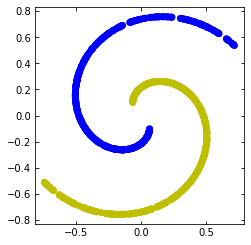

In [3]:
#RING, z = generatorringsgap(1000, resnet=False)
RING, z = spiral(1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
ax.tick_params(direction='in', top=True, right=True)

def binarycolor(Z, c1, c2):
    
    import numpy as np
    
    Z = np.where(Z==0, c1, Z)
    Z = np.where(Z=='1', c2, Z)
    
    return Z


plt.scatter(RING[0], RING[1], c=binarycolor(z, "b", "y"))
#plt.scatter(RING[0], RING[1])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.transpose(RING), z, test_size=0.5, random_state=0)
plt.savefig("distribution.jpg")

In [4]:
model.fit(X_train, y_train, epochs=15000, batch_size=50, verbose=0)

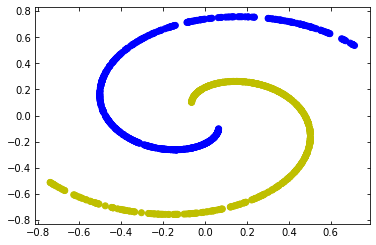

In [5]:

zz = model.predict(np.transpose(RING)).reshape(1000,)


from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(direction='in', top=True, right=True)

ax.scatter(RING[0], RING[1], c=binarycolor(z, "b", "y"))
plt.show()

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras import models

slope=3
offset=0
#offset=2
iii=199

jjj=000

for iii in range(51):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    #activation_model = models.Model(inputs=model.input, outputs=model.layers[j].output)
    activation_model = models.Model(inputs=model.input, outputs=model.layers[slope*iii+offset].output)
    activations = activation_model.predict(np.transpose(RING))
    ax.scatter(np.transpose(activations)[0], np.transpose(activations)[1], c=binarycolor(z, "b", "y"))




    grid_x = np.linspace(-1,1,10)
    grid_y = np.linspace(-1,1,10)
    grid_z = np.zeros((10,))



    for i in range(10):

        vector = []

        for j in range(10):
            vector.append([grid_x[i], grid_y[j]])

        act = activation_model.predict(np.array(vector))                  
        plt.plot(np.transpose(act)[0], np.transpose(act)[1], c="k")

    for i in range(10):

        vector = []

        for j in range(10):
            vector.append([grid_x[j], grid_y[i]])

        act = activation_model.predict(np.array(vector))                  
        plt.plot(np.transpose(act)[0], np.transpose(act)[1],  c="k")

    ax.set_axis_off()
    #ax.view_init(-30, 0)

    plt.title("Hidden layer "+str(iii))
    #plt.savefig("2DRESNET/TANH_/im"+str(iii).zfill(2)+".png",bbox_inches='tight')
    plt.savefig("2DRESNET/SPIRAL/im"+str(iii).zfill(2)+".png",bbox_inches='tight')

    #plt.show()
    plt.close("all")

In [7]:
import glob
from PIL import Image

h = 2
# filepaths
fp_in = "2DRESNET/SPIRAL/*.png"

fp_out = "gifs/2dbendingspiral"+str(h)+".gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=300, loop=0, quality=95)

grid_x = np.linspace(-1,1,10)
grid_y = np.linspace(-1,1,10)



for i in range(10):
    
    vector = []
    
    for j in range(10):
        vector.append([grid_x[i], grid_y[j]])
    
    act = activation_model.predict(np.array(vector))                  
    plt.plot(np.transpose(act)[0], np.transpose(act)[1], c="k")
    
for i in range(10):
    
    vector = []
    
    for j in range(10):
        vector.append([grid_x[j], grid_y[i]])
    
    act = activation_model.predict(np.array(vector))                  
    plt.plot(np.transpose(act)[0], np.transpose(act)[1], c="k")


        
        

print(activation_model.predict(np.array([[0,0], [1,1]])))